# Basemap Tutorial

**Chapters:**

> 1. Map Making - Coordinates, Map Extent, and Resolution
> 2. Projections
> 3. Adding XY data
> 4. Using Shapefiles
> 5. Accessing Shapefile Attributes
> 6. Selecting Locations Based on Attributes 

# 1. Map Making - Coordinates, Map Extent, and Resolution

In [7]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

% matplotlib inline

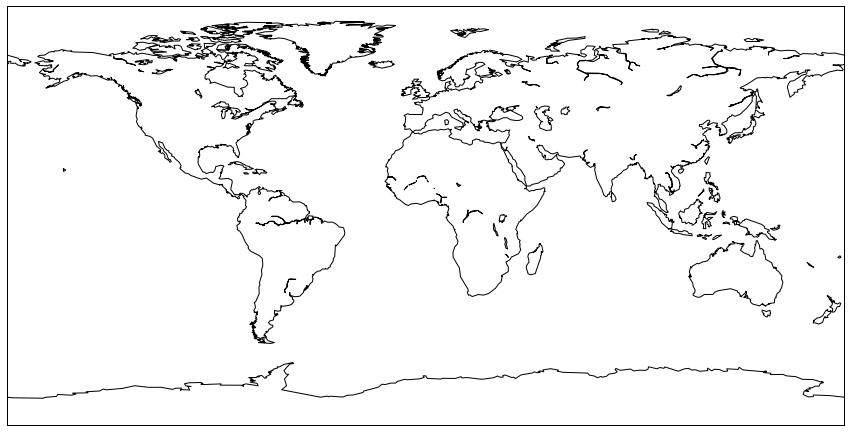

In [2]:
# Lets make a empty figure to hold the map and let's make it big so we can see everything
fig = plt.figure(figsize=(15,15))

# Instantiates basemap class
my_map = Basemap()

# The my_map variable isn't a map image in itself.  Let's draw the coast lines so we can actually see something
my_map.drawcoastlines()

#plt.show()

**Looks good so far.  You can imagine this figure like any other matplotlib figure and it has similarities to some of the graphs you made before.  For instance, line graphs have an x and y coordinates.  Maps do too but instead it's listed as longitude (x) and latitude (y).  However, the common notation when you reference places is normally shown has latitude, longitude.  For example: New York City's coordinates are 40.7128 North (latitude), 74.0060 West (longitude).**

**This map is centered at (0, 0), where the Equator and Prime Meriden meet.  We can change the center of the map by changing the inputs of lat_0 and lon_0 arguments in the Basemap class.**

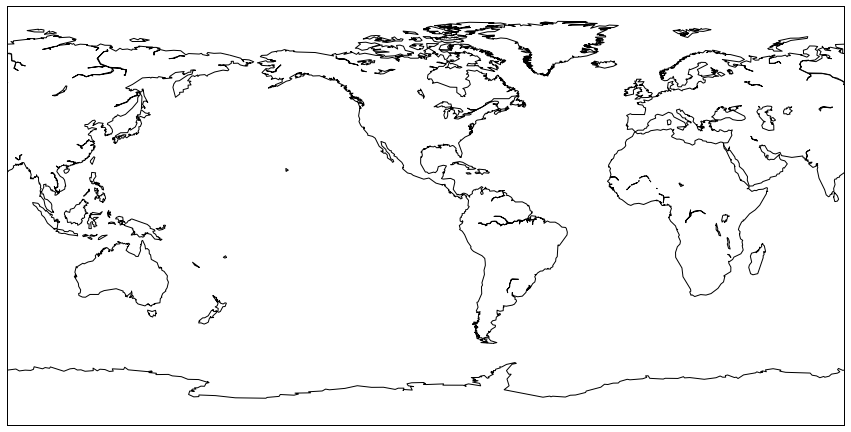

In [3]:
# Let's center the map at the United States
fig = plt.figure(figsize=(15,15))

my_map = Basemap(lat_0=37.0902, lon_0=-95.7129)
my_map.drawcoastlines()

#plt.show()

**Why is longitude negative?  The previous map was centered at (0,0) and if you think of a map like a coordinate plane, the United States is up and to the left of that point where x would be negative and y would be positive.  So the coordinates of United States are at 37.0902 North, 95.7129 West translates to (37.0902 N, -95.7129 W).**

**Our map looks kind of simple.  Let's add some colors.  We can use 2 new methods called .drawmapboundary and .fillcontinents.**

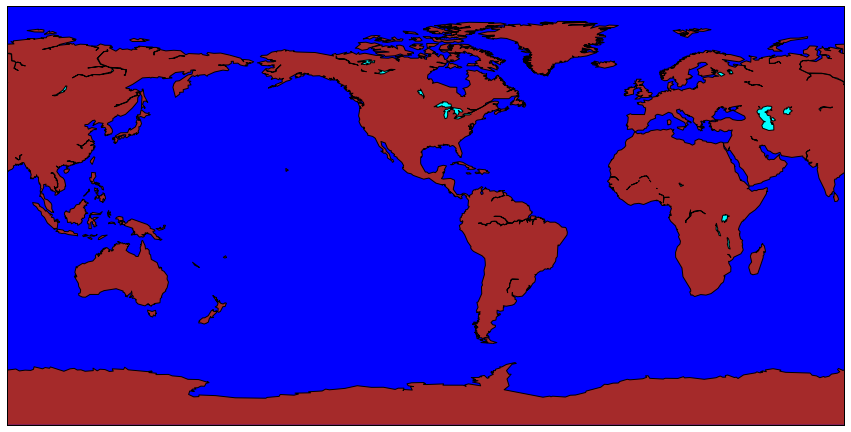

In [4]:
fig = plt.figure(figsize=(15,15))

my_map = Basemap(lat_0=37.0902, lon_0=-95.7129)

# This makes a map boundary.  We can there's an argument called fill_color that can be used for the oceans.  Let's make it blue.
my_map.drawmapboundary(fill_color='blue')

# This fills in the continents and has two arguments for the colors of the continents and the big lakes in the continents.  
my_map.fillcontinents(color='brown', lake_color='cyan')

# Don't forget to add this as this will draw the map.  Always make sure this is after all the other steps in your code.
my_map.drawcoastlines()

#plt.show()

**What if I don't want the view the whole world and I only want to view a part of it, say the United States?  We can do that by adding in four arguments into the Basemap class.  These four arguments are the coordinates for the "corners" of what you want to show of the map, which is also called the map extent.  We only need to specify the "lower left" corner and the "upper right" corner coordinates.  This means we need four values as each coordinate has both a latitude and a longitude.**

**These arguements are in the Basemap class as llcrnrlat, llcrnrlon, urcrnrlat, urcrnrlon.  You can think of it as "ll" means "lower left", "ur" means "upper right", "crnr" means "corner", "lat" is "latitude", and "lon" is "longitude".  So "llcrnrlat" means "lower left corner latitude", "urcrnrlon" means "upper right corner longitude", etc.**

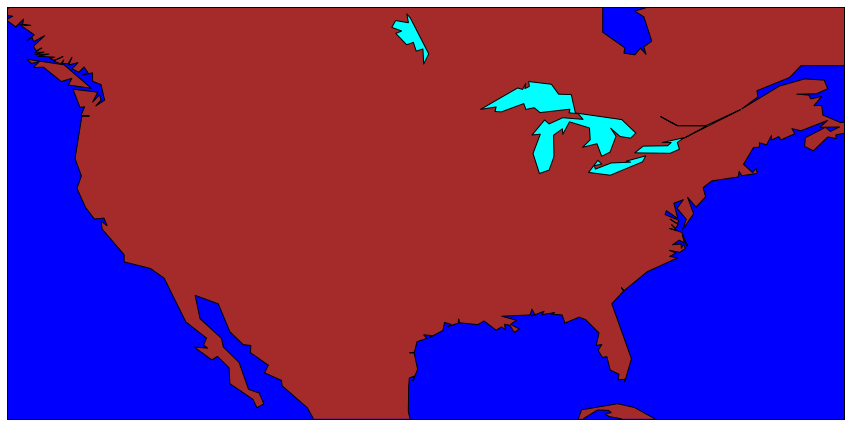

In [5]:
fig = plt.figure(figsize=(15,15))

# Lets show only the United States
my_map = Basemap(lat_0=37.0902, lon_0=-95.7129, llcrnrlon=-130, llcrnrlat=22, urcrnrlon=-63, urcrnrlat=55)

# This makes a map boundary.  We can there's an argument called fill_color that can be used for the oceans.  Let's make it blue.
my_map.drawmapboundary(fill_color='blue')

# This fills in the continents and has two arguments for the colors of the continents and the big lakes in the continents.  
my_map.fillcontinents(color='brown', lake_color='cyan')

# Don't forget to add this as this will draw the map.  Always make sure this is after all the other steps in your code.
my_map.drawcoastlines()

#plt.show()

**Our map is getting there but it still looks kind of crudely drawn.  We can change that in the "resolution" argument inside the Basemap class.  The default is set to "c", which stands for crude, the lowest resolution.  Lower resolutions draw faster but don't look as nice.  It's better to work in a crude resolution until you finish all your coding.  When you want to show your final map, then you can switch the resolution to a higher setting so it looks nice.**

**The arguments for resolution can be "c" for "crude" (lowest), "l" for "low, "i" for "intermediate", "h" for "high", and "f" for full (highest).**

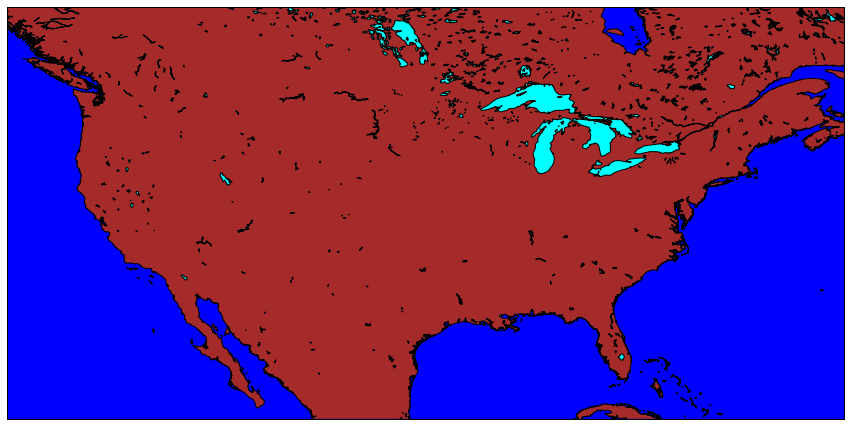

In [6]:

fig = plt.figure(figsize=(15,15))

# Let's change the resolution to high - This will take much longer to draw
my_map = Basemap(lat_0=37.0902, lon_0=-95.7129, llcrnrlon=-130, llcrnrlat=22, urcrnrlon=-63, urcrnrlat=55, resolution='h')

# This makes a map boundary.  We can there's an argument called fill_color that can be used for the oceans.  Let's make it blue.
my_map.drawmapboundary(fill_color='blue')

# This fills in the continents and has two arguments for the colors of the continents and the big lakes in the continents.  
my_map.fillcontinents(color='brown', lake_color='cyan')

# Don't forget to add this as this will draw the map.  Always make sure this is after all the other steps in your code.
my_map.drawcoastlines()

#plt.show()

**This looks much better.  The coastlines look more realistic.  You can see islands that weren't there before in the crude map.  You can see many of the smaller lakes and even some of the more important ones like the Great Salt Lake in Utah.  But did you notice how long it took to draw...**

#### CHALLENGE 1

#### CHALLENGE 2

#### CHALLENGE 3

# 2. Projections

**A projection is a representation of Earth that is required to make a map.  Because the Earth is a sphere but our computer screens and maps are two dimensions, we need a projection to visualize what we want to see.  Unfortunately projections will distort certain aspects of reality in order to make the map, such as areas, distances, directions, etc.  Depending on what and where you want to focus on, you'll need to use the right projection.**

**The default projection is "cyl", which is the simplest projection.  It displays the world as latitude and longitude coordinates.  Let's see what the default map projection looks like and we'll add the longitude and latitude lines to give you a reference with two more methods - "drawparallels (latitude) and .drawmeridians (longitude).**

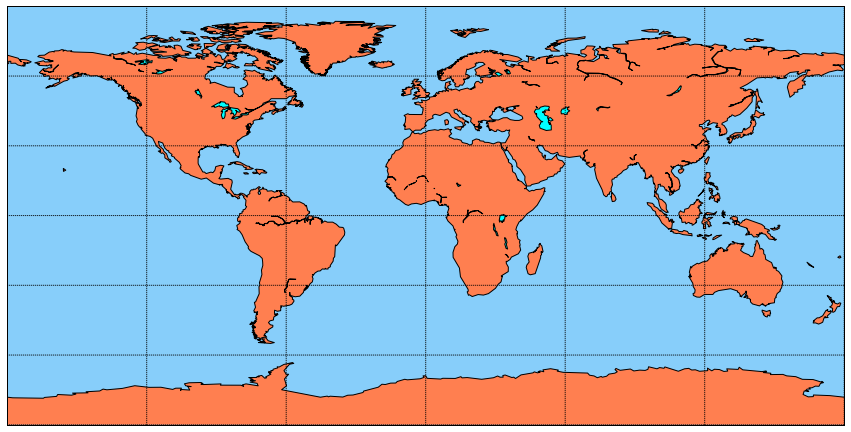

In [8]:
fig = plt.figure(figsize=(15,15))

# Instantiates basemap class
my_map = Basemap(projection='cyl', resolution='c', lat_0=0, lon_0=0)

my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')
# The my_map variable isn't a map image in itself.  Let's draw the coast lines so we can actually see something

# Let draw every 30 degree latitude lines in between both poles
my_map.drawparallels(np.arange(-90, 91, 30))

# Let draw every 60 degree longitude lines from the Prime Meridian
my_map.drawmeridians(np.arange(-180, 181, 60))
my_map.drawcoastlines()


**This projection is simple but shapes and areas get distored as you look at places further away from the equator.  Also, this makes the Earth look flat, which we know isn't the case.  Let's change the projection to make it seem something that looks more realistic.  We'll use an "orthographic" projection.**


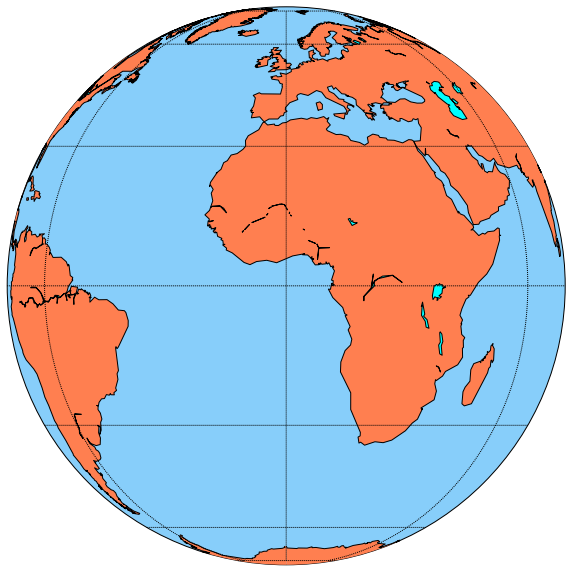

In [9]:
# Let's make the figure a little smaller so it's not as big
fig = plt.figure(figsize=(10,10))

# Let's use an "orthographic" projection
my_map = Basemap(projection='ortho', resolution='c', lat_0=0, lon_0=0)

my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')
# The my_map variable isn't a map image in itself.  Let's draw the coast lines so we can actually see something

# Let draw every 30 degree latitude lines in between both poles
my_map.drawparallels(np.arange(-90, 91, 30))

# Let draw every 60 degree longitude lines from the Prime Meridian
my_map.drawmeridians(np.arange(-180, 181, 60))
my_map.drawcoastlines()


**This looks like a pretty realistic view of the world.  This projection represents looking at the world from a satellite infinately high looking down at where we centered the map (0, 0).  Africa looks pretty well represented but now we can't see other parts of the world.**

**Let's expand what we can see by trying another projection called "azimuthal equidistant projection".**

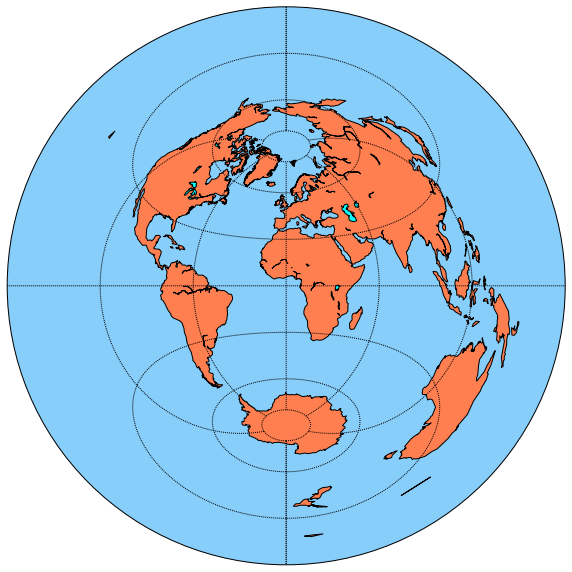

In [10]:
# Let's make the figure a little smaller so it's not as big
fig = plt.figure(figsize=(10,10))

# Let's use an azimuthal equidistant projection
my_map = Basemap(projection='aeqd', resolution='c', lat_0=0, lon_0=0)

my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')
# The my_map variable isn't a map image in itself.  Let's draw the coast lines so we can actually see something

# Let draw every 30 degree latitude lines in between both poles
my_map.drawparallels(np.arange(-90, 91, 30))

# Let draw every 60 degree longitude lines from the Prime Meridian
my_map.drawmeridians(np.arange(-180, 181, 60))
my_map.drawcoastlines()


**We can see the whole world again but you can see shape distorsions as we move away from the center point where the Equator and Prime Meridan meet.  Also this projection makes the latitude and longitude lines look kind of strange.  This projection is useful for determining accurate distances from the center point (in this case 0,0).**

**Let's now focus back on the United States with the default projection.**

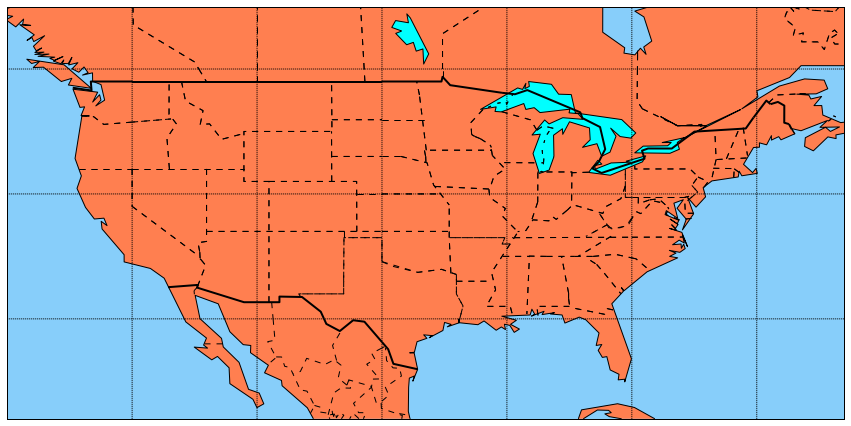

In [11]:
# Let's make the figure a little smaller so it's not as big
fig = plt.figure(figsize=(15,15))

# Let's use focus back on the United States and change it back to the simple Cylindrical Equidistance Projection
my_map = Basemap(projection='cyl', resolution='c', lat_0=37.0902, lon_0=-95.7129, llcrnrlon=-130, llcrnrlat=22, urcrnrlon=-63, urcrnrlat=55)

my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')
# The my_map variable isn't a map image in itself.  Let's draw the coast lines so we can actually see something

# Let draw every 10 degree latitude lines for reference
my_map.drawparallels(np.arange(-90, 91, 10))

# Let draw every 10 degree longitude lines for reference
my_map.drawmeridians(np.arange(-180, 181, 10))

# Lets add state and country boundaries for reference
my_map.drawstates(linewidth=1.0, linestyle='dashed')
my_map.drawcountries(linewidth=2.0, linestyle='solid')
my_map.drawcoastlines()


**Instead of passing in a argument in the projection parameter for Basemap, you could also use an EPSG code for determining projections.  EPSG (European Petroleum Survey Group) is a standard way to name projections in a numerical format.  You will need to know this when you want to transform coordinate systems in certain files, like shapefiles as we will see in the next section.  Importing files with different coordinate systems will either cause an error or not line up properly if they plot on the map.**

**Let's try using EPSG code 4326.  This is the code for the World Geodetic System 1984 system (WGS 84), which is the standard coordinate system used in Global Positioning System (GPS).**

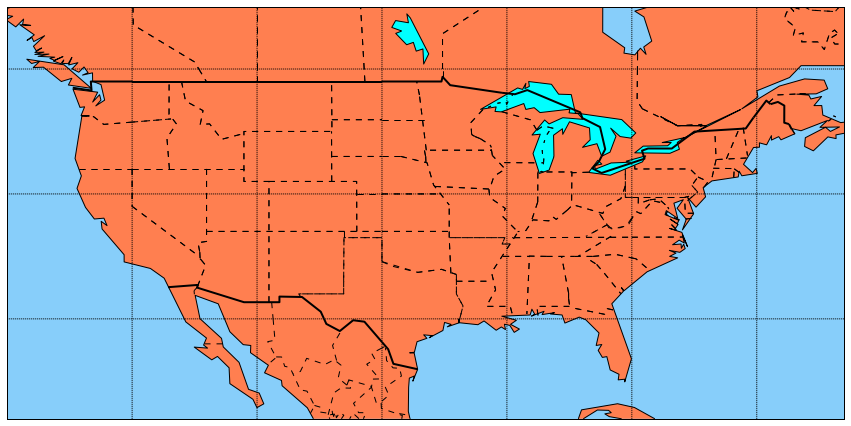

In [12]:
# Let's make the figure a little smaller so it's not as big
fig = plt.figure(figsize=(15,15))

my_map = Basemap(resolution='c', 
                 lat_0=37.0902, 
                 lon_0=-95.7129, 
                 llcrnrlon=-130,
                 llcrnrlat=22,
                 urcrnrlon=-63,
                 urcrnrlat=55,
                epsg=4326)

my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')
# The my_map variable isn't a map image in itself.  Let's draw the coast lines so we can actually see something

# Let draw every 10 degree latitude lines for reference
my_map.drawparallels(np.arange(-90, 91, 10))

# Let draw every 10 degree longitude lines for reference
my_map.drawmeridians(np.arange(-180, 181, 10))
my_map.drawstates(linewidth=1.0, linestyle='dashed')
my_map.drawcountries(linewidth=2.0, linestyle='solid')
my_map.drawcoastlines()

**This map looks exactly like the map above.  This is because they are!  Our looks familiar but you may have noticed that the states look kind of stange.  Montana looks like a very long rectangle.  This is because the area is distorted.  Let's change this to a standard projection for visualizing an the United States with an "Albers Equal Area" projection.**

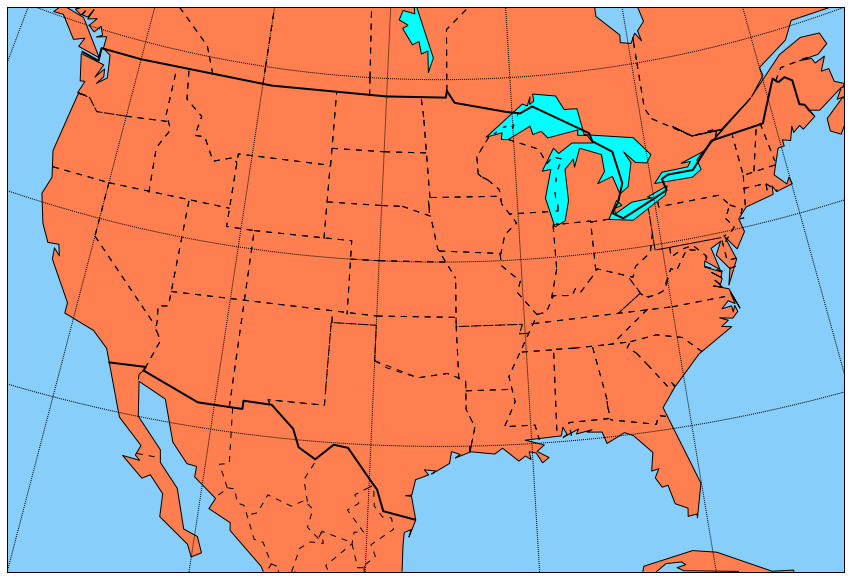

In [11]:
# Let's make the figure a little smaller so it's not as big
fig = plt.figure(figsize=(15,15))

# Let's use an Albers Equal Area
my_map = Basemap(projection='aea', resolution='c', lat_0=37.0902, lon_0=-95.7129, llcrnrlon=-120, llcrnrlat=20, urcrnrlon=-62, urcrnrlat=50)

my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')

# Let draw every 10 degree latitude lines for reference
my_map.drawparallels(np.arange(-90, 91, 10))

# Let draw every 10 degree longitude lines for reference
my_map.drawmeridians(np.arange(-180, 181, 10))
my_map.drawstates(linewidth=1.0, linestyle='dashed')
my_map.drawcountries(linewidth=2.0, linestyle='solid')
my_map.drawcoastlines()


**This should look more familiar.**  

**Depending on the purpose of what you are looking at, whether it be area, distance, or shape, you'll have to adjust your projection accordingly.**  

# 3.  Using Shapefiles

**Shapefiles are a common file format for visualizing geospatial data.  Shapefiles can consist of points, lines, and polygons that show up on your map.  These points, lines, and polygons can also have a lot of information about each spatial data point in what is called an attribute table.  Shapefiles consists of multiple files when you download them and we can explore them in this chapter.**

ValueError: shapefile must have lat/lon vertices  - it looks like this one has vertices
in map projection coordinates. You can convert the shapefile to geographic
coordinates using the shpproj utility from the shapelib tools
(http://shapelib.maptools.org/shapelib-tools.html)

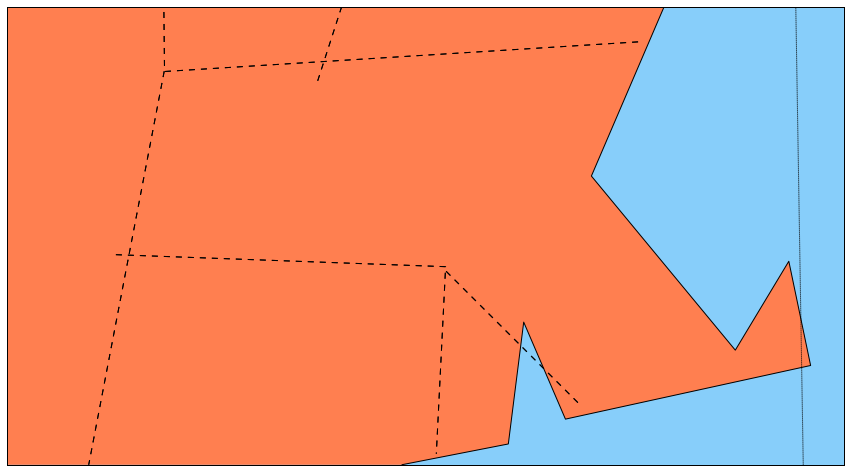

In [18]:
# Let's make the figure a little smaller so it's not as big
fig = plt.figure(figsize=(15,15))

# Let's use focus our area on Massachusetts
my_map = Basemap(projection='aea', resolution='c', lat_0=42.4072, lon_0=-71.3821, llcrnrlon=-74, llcrnrlat=41.25, urcrnrlon=-69.75, urcrnrlat=43)
my_map.drawmapboundary(fill_color='lightskyblue')
my_map.fillcontinents(color='coral', lake_color='cyan')


# Let draw every 10 degree latitude lines for reference
my_map.drawparallels(np.arange(-90, 91, 10))

# Let draw every 10 degree longitude lines for reference
my_map.drawmeridians(np.arange(-180, 181, 10))
my_map.drawstates(linewidth=1.0, linestyle='dashed')
my_map.drawcoastlines()

my_map.readshapefile('./Boston_aea', 'boston')


**Oh no!  We got this error because the shapefile is not in the right projection.  Shapefiles need to be in the standard geogrpahic coordinate system (i.e. EPSG 4326).  So we need to reproject this shapefile and we can do that with ?**

# I plan to do more so stay tuned....

# Any feedback is welcome.  You can email me at chris.mantell@gmail.com